In [213]:
%run ./resources/library.py

<Figure size 432x288 with 0 Axes>

In [214]:
style_notebook()

# Notebook 2: Exploring TB and Socio-economic Indicators, Part 1

## Goals

Our goal for this TB exploration notebook is to construct a "gapminder" for TB data and a time series choropleth map. See figures below.

![Gapminder for TB](images/gapminder-for-tb.png)

**Figure 1**. Interactive Gapminder bubble chart for TB data

![Choropleth Timeseries for TB](images/choropleth-timeseries-tb.png)

**Figure 2**. Interactive choropleth map for TB data

## Steps

Notebook 2
1. Set up data exploration environment
2. Download and clean up data from the WHO, World Bank

## STEP 1. Set up data exploration environment

To create visualizations, we will use Plotly Express. You can learn more about Plotly Express from:
1. [Plotly GitHub Site](https://github.com/plotly/plotly_express) (GitHub)
2. [Jupyter Notebook Example](https://www.plotly.express/)
3. Some articles written about it [here](https://medium.com/@plotlygraphs/introducing-plotly-express-808df010143d) and [here](https://towardsdatascience.com/plotly-express-the-good-the-bad-and-the-ugly-dc941649687c)

In [215]:
import plotly_express as px
px.__version__

'0.3.1'

We will also use our Swiss Army knife for data science, `pandas`.

In [216]:
import pandas as pd
pd.__version__

'0.24.2'

In [217]:
pd.set_option('max_colwidth', 150)
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 1000)

**`missingno`**: Missing data visualization module for Python 

Read more about it here: https://github.com/ResidentMario/missingno

In [218]:
import missingno as mno
mno.__version__

'0.4.1'

In [219]:
import matplotlib

matplotlib.__version__

'3.0.3'

In [220]:
%matplotlib inline

In [221]:
import numpy as np

np.__version__

'1.16.4'

## STEP 2. Download and clean up data

All data files are found in the `resources` folder. You can also download these using the links and instructions below.

### 1. World Health Organization (WHO), estimates of TB burden

Data from 2000-2017 provided by countries to WHO and estimates of TB burden generated by WHO for the Global Tuberculosis Report. 

1. Source, data: https://extranet.who.int/tme/generateCSV.asp?ds=estimates
2. Source, metadata: https://extranet.who.int/tme/generateCSV.asp?ds=dictionary
3. Instructions: No need to modify CSV download.

**Aggregate Data**

In [222]:
tb_df1 = pd.read_csv("resources/TB_burden_countries_2019-07-03.csv")

tb_df1.head()

country iso2 iso3  iso_numeric g_whoregion  year  e_pop_num  \
0  Afghanistan   AF  AFG            4         EMR  2000   20093756   
1  Afghanistan   AF  AFG            4         EMR  2001   20966463   
2  Afghanistan   AF  AFG            4         EMR  2002   21979923   
3  Afghanistan   AF  AFG            4         EMR  2003   23064851   
4  Afghanistan   AF  AFG            4         EMR  2004   24118979   

   e_inc_100k  e_inc_100k_lo  e_inc_100k_hi  e_inc_num  e_inc_num_lo  \
0       190.0          123.0          271.0      38000         25000   
1       189.0          123.0          271.0      40000         26000   
2       189.0          122.0          270.0      42000         27000   
3       189.0          122.0          270.0      44000         28000   
4       189.0          122.0          270.0      46000         29000   

   e_inc_num_hi  e_tbhiv_prct  e_tbhiv_prct_lo  e_tbhiv_prct_hi  \
0         54000          0.36             0.12             0.72   
1         57000          0.30             0.10             0.61   
2         59000          0.26             0.09             0.52   
3         62000          0.23             0.09             0.45   
4         65000          0.22             0.08             0.42   

   e_inc_tbhiv_100k  e_inc_tbhiv_100k_lo  e_inc_tbhiv_100k_hi  \
0              0.68                 0.20                 1.50   
1              0.57                 0.16                 1.20   
2              0.49                 0.15                 1.00   
3              0.44                 0.14                 0.92   
4              0.41                 0.13                 0.85   

   e_inc_tbhiv_num  e_inc_tbhiv_num_lo  e_inc_tbhiv_num_hi  \
0            140.0                40.0               290.0   
1            120.0                34.0               260.0   
2            110.0                32.0               230.0   
3            100.0                31.0               210.0   
4            100.0                32.0               210.0   

   e_mort_exc_tbhiv_100k  e_mort_exc_tbhiv_100k_lo  e_mort_exc_tbhiv_100k_hi  \
0                   67.0                      39.0                     103.0   
1                   62.0                      36.0                      95.0   
2                   56.0                      33.0                      86.0   
3                   57.0                      33.0                      87.0   
4                   51.0                      30.0                      77.0   

   e_mort_exc_tbhiv_num  e_mort_exc_tbhiv_num_lo  e_mort_exc_tbhiv_num_hi  \
0                 14000                   7800.0                  21000.0   
1                 13000                   7500.0                  20000.0   
2                 12000                   7200.0                  19000.0   
3                 13000                   7700.0                  20000.0   
4                 12000                   7100.0                  19000.0   

   e_mort_tbhiv_100k  e_mort_tbhiv_100k_lo  e_mort_tbhiv_100k_hi  \
0               0.15                  0.00                  0.77   
1               0.17                  0.00                  0.62   
2               0.27                  0.08                  0.58   
3               0.25                  0.07                  0.52   
4               0.21                  0.07                  0.43   

   e_mort_tbhiv_num  e_mort_tbhiv_num_lo  e_mort_tbhiv_num_hi  e_mort_100k  \
0                31                    0                  160         67.0   
1                35                    1                  130         62.0   
2                60                   17                  130         56.0   
3                57                   17                  120         57.0   
4                50                   16                  100         51.0   

   e_mort_100k_lo  e_mort_100k_hi  e_mort_num  e_mort_num_lo  e_mort_num_hi  \
0            39.0           104.0       14000           7800          21000   
1     

In [107]:
tb_df1.columns

Index(['country', 'iso2', 'iso3', 'iso_numeric', 'g_whoregion', 'year',
       'e_pop_num', 'e_inc_100k', 'e_inc_100k_lo', 'e_inc_100k_hi',
       'e_inc_num', 'e_inc_num_lo', 'e_inc_num_hi', 'e_tbhiv_prct',
       'e_tbhiv_prct_lo', 'e_tbhiv_prct_hi', 'e_inc_tbhiv_100k',
       'e_inc_tbhiv_100k_lo', 'e_inc_tbhiv_100k_hi', 'e_inc_tbhiv_num',
       'e_inc_tbhiv_num_lo', 'e_inc_tbhiv_num_hi', 'e_mort_exc_tbhiv_100k',
       'e_mort_exc_tbhiv_100k_lo', 'e_mort_exc_tbhiv_100k_hi',
       'e_mort_exc_tbhiv_num', 'e_mort_exc_tbhiv_num_lo',
       'e_mort_exc_tbhiv_num_hi', 'e_mort_tbhiv_100k', 'e_mort_tbhiv_100k_lo',
       'e_mort_tbhiv_100k_hi', 'e_mort_tbhiv_num', 'e_mort_tbhiv_num_lo',
       'e_mort_tbhiv_num_hi', 'e_mort_100k', 'e_mort_100k_lo',
       'e_mort_100k_hi', 'e_mort_num', 'e_mort_num_lo', 'e_mort_num_hi', 'cfr',
       'cfr_lo', 'cfr_hi', 'c_newinc_100k', 'c_cdr', 'c_cdr_lo', 'c_cdr_hi'],
      dtype='object')

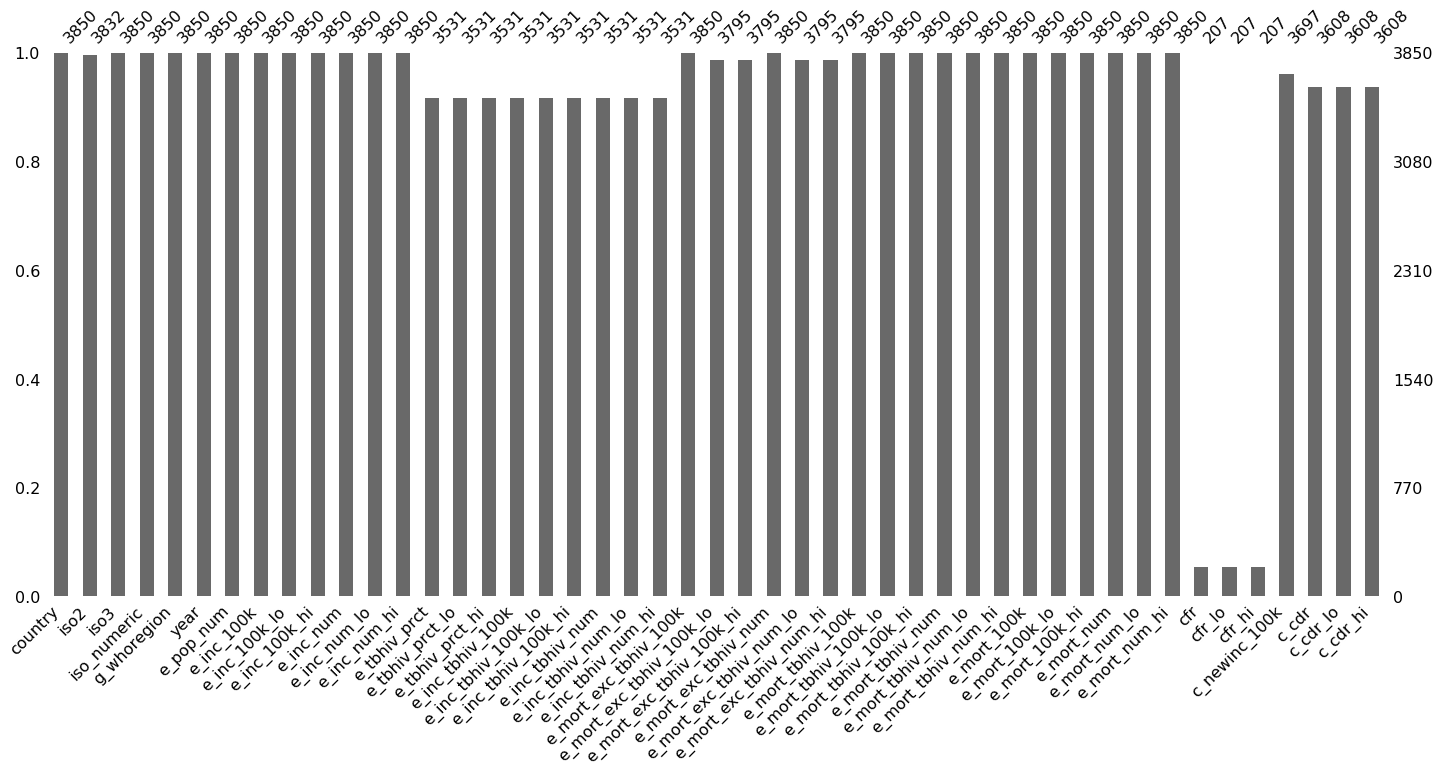

In [309]:
mno.bar(tb_df1)

**Data Dictionary**

You can look up the definitions of the columns above using the data dictionary dataframe.

In [108]:
tb_dict_df = pd.read_csv("resources/TB_data_dictionary_2019-07-03.csv")

tb_dict_df.head()

variable_name dataset code_list  \
0  budget_cpp_dstb  Budget       NaN   
1   budget_cpp_mdr  Budget       NaN   
2   budget_cpp_xdr  Budget       NaN   
3       budget_fld  Budget       NaN   
4       budget_lab  Budget       NaN   

                                                                                                          definition  
0  Average cost of drugs budgeted per patient for drug-susceptible TB treatment, excluding buffer stock (US Dollars)  
1               Average cost of drugs budgeted per patient for MDR-TB treatment, excluding buffer stock (US Dollars)  
2               Average cost of drugs budgeted per patient for XDR-TB treatment, excluding buffer stock (US Dollars)  
3                                                Budget required for drugs to treat drug-susceptible TB (US Dollars)  
4                                 Budget required for laboratory infrastructure, equipment and supplies (US Dollars)

You can also query the dataframe for specific variables, as shown below.

In [109]:
tb_dict_df.query("variable_name=='e_mort_num'")

variable_name    dataset code_list  \
103    e_mort_num  Estimates       NaN   

                                         definition  
103  Estimated number of deaths from TB (all forms)

In [110]:
tb_dict_df.query("variable_name=='e_inc_100k'")

variable_name    dataset code_list  \
76    e_inc_100k  Estimates       NaN   

                                                definition  
76  Estimated incidence (all forms) per 100 000 population

In [111]:
tb_dict_df.query("variable_name=='e_inc_tbhiv_100k'")

variable_name    dataset code_list  \
85  e_inc_tbhiv_100k  Estimates       NaN   

                                                                     definition  
85  Estimated incidence of TB cases who are HIV-positive per 100 000 population

#### Prepare for second merge between TB data and the merged WB data

In [112]:
tb_df1.head()

country iso2 iso3  iso_numeric g_whoregion  year  e_pop_num  \
0  Afghanistan   AF  AFG            4         EMR  2000   20093756   
1  Afghanistan   AF  AFG            4         EMR  2001   20966463   
2  Afghanistan   AF  AFG            4         EMR  2002   21979923   
3  Afghanistan   AF  AFG            4         EMR  2003   23064851   
4  Afghanistan   AF  AFG            4         EMR  2004   24118979   

   e_inc_100k  e_inc_100k_lo  e_inc_100k_hi  e_inc_num  e_inc_num_lo  \
0       190.0          123.0          271.0      38000         25000   
1       189.0          123.0          271.0      40000         26000   
2       189.0          122.0          270.0      42000         27000   
3       189.0          122.0          270.0      44000         28000   
4       189.0          122.0          270.0      46000         29000   

   e_inc_num_hi  e_tbhiv_prct  e_tbhiv_prct_lo  e_tbhiv_prct_hi  \
0         54000          0.36             0.12             0.72   
1         57000          0.30             0.10             0.61   
2         59000          0.26             0.09             0.52   
3         62000          0.23             0.09             0.45   
4         65000          0.22             0.08             0.42   

   e_inc_tbhiv_100k  e_inc_tbhiv_100k_lo  e_inc_tbhiv_100k_hi  \
0              0.68                 0.20                 1.50   
1              0.57                 0.16                 1.20   
2              0.49                 0.15                 1.00   
3              0.44                 0.14                 0.92   
4              0.41                 0.13                 0.85   

   e_inc_tbhiv_num  e_inc_tbhiv_num_lo  e_inc_tbhiv_num_hi  \
0            140.0                40.0               290.0   
1            120.0                34.0               260.0   
2            110.0                32.0               230.0   
3            100.0                31.0               210.0   
4            100.0                32.0               210.0   

   e_mort_exc_tbhiv_100k  e_mort_exc_tbhiv_100k_lo  e_mort_exc_tbhiv_100k_hi  \
0                   67.0                      39.0                     103.0   
1                   62.0                      36.0                      95.0   
2                   56.0                      33.0                      86.0   
3                   57.0                      33.0                      87.0   
4                   51.0                      30.0                      77.0   

   e_mort_exc_tbhiv_num  e_mort_exc_tbhiv_num_lo  e_mort_exc_tbhiv_num_hi  \
0                 14000                   7800.0                  21000.0   
1                 13000                   7500.0                  20000.0   
2                 12000                   7200.0                  19000.0   
3                 13000                   7700.0                  20000.0   
4                 12000                   7100.0                  19000.0   

   e_mort_tbhiv_100k  e_mort_tbhiv_100k_lo  e_mort_tbhiv_100k_hi  \
0               0.15                  0.00                  0.77   
1               0.17                  0.00                  0.62   
2               0.27                  0.08                  0.58   
3               0.25                  0.07                  0.52   
4               0.21                  0.07                  0.43   

   e_mort_tbhiv_num  e_mort_tbhiv_num_lo  e_mort_tbhiv_num_hi  e_mort_100k  \
0                31                    0                  160         67.0   
1                35                    1                  130         62.0   
2                60                   17                  130         56.0   
3                57                   17                  120         57.0   
4                50                   16                  100         51.0   

   e_mort_100k_lo  e_mort_100k_hi  e_mort_num  e_mort_num_lo  e_mort_num_hi  \
0            39.0           104.0       14000           7800          21000   
1     

For ease of merges between dataframes, we will use common field names:
1. `Country` (country name)
2. `ISO_Alpha` (3-letter ISO country code)
3. `Year`

In [320]:
tb_df2 = tb_df1.rename(\
        columns={'country': 'Country', 'iso3': 'ISO_Alpha', 'year': 'Year'})

tb_df2.head()

Country iso2 ISO_Alpha  iso_numeric g_whoregion  Year  e_pop_num  \
0  Afghanistan   AF       AFG            4         EMR  2000   20093756   
1  Afghanistan   AF       AFG            4         EMR  2001   20966463   
2  Afghanistan   AF       AFG            4         EMR  2002   21979923   
3  Afghanistan   AF       AFG            4         EMR  2003   23064851   
4  Afghanistan   AF       AFG            4         EMR  2004   24118979   

   e_inc_100k  e_inc_100k_lo  e_inc_100k_hi  e_inc_num  e_inc_num_lo  \
0       190.0          123.0          271.0      38000         25000   
1       189.0          123.0          271.0      40000         26000   
2       189.0          122.0          270.0      42000         27000   
3       189.0          122.0          270.0      44000         28000   
4       189.0          122.0          270.0      46000         29000   

   e_inc_num_hi  e_tbhiv_prct  e_tbhiv_prct_lo  e_tbhiv_prct_hi  \
0         54000          0.36             0.12             0.72   
1         57000          0.30             0.10             0.61   
2         59000          0.26             0.09             0.52   
3         62000          0.23             0.09             0.45   
4         65000          0.22             0.08             0.42   

   e_inc_tbhiv_100k  e_inc_tbhiv_100k_lo  e_inc_tbhiv_100k_hi  \
0              0.68                 0.20                 1.50   
1              0.57                 0.16                 1.20   
2              0.49                 0.15                 1.00   
3              0.44                 0.14                 0.92   
4              0.41                 0.13                 0.85   

   e_inc_tbhiv_num  e_inc_tbhiv_num_lo  e_inc_tbhiv_num_hi  \
0            140.0                40.0               290.0   
1            120.0                34.0               260.0   
2            110.0                32.0               230.0   
3            100.0                31.0               210.0   
4            100.0                32.0               210.0   

   e_mort_exc_tbhiv_100k  e_mort_exc_tbhiv_100k_lo  e_mort_exc_tbhiv_100k_hi  \
0                   67.0                      39.0                     103.0   
1                   62.0                      36.0                      95.0   
2                   56.0                      33.0                      86.0   
3                   57.0                      33.0                      87.0   
4                   51.0                      30.0                      77.0   

   e_mort_exc_tbhiv_num  e_mort_exc_tbhiv_num_lo  e_mort_exc_tbhiv_num_hi  \
0                 14000                   7800.0                  21000.0   
1                 13000                   7500.0                  20000.0   
2                 12000                   7200.0                  19000.0   
3                 13000                   7700.0                  20000.0   
4                 12000                   7100.0                  19000.0   

   e_mort_tbhiv_100k  e_mort_tbhiv_100k_lo  e_mort_tbhiv_100k_hi  \
0               0.15                  0.00                  0.77   
1               0.17                  0.00                  0.62   
2               0.27                  0.08                  0.58   
3               0.25                  0.07                  0.52   
4               0.21                  0.07                  0.43   

   e_mort_tbhiv_num  e_mort_tbhiv_num_lo  e_mort_tbhiv_num_hi  e_mort_100k  \
0                31                    0                  160         67.0   
1                35                    1                  130         62.0   
2                60                   17                  130         56.0   
3                57                   17                  120         57.0   
4                50                   16                  100         51.0   

   e_mort_100k_lo  e_mort_100k_hi  e_mort_num  e_mort_num_lo  e_mort_num_hi  \
0            39.0           104.0       14000          

#### Pickle WHO TB data set

In [114]:
tb_df2.to_pickle('outputs/tb_df2.pickle')
tb_dict_df.to_pickle('outputs/tb_dict_df.pickle')

### 2. World Bank (WB), World Gross Domestic Product (GDP) Data, 1960-2018

**Aggregate Data, GDP**

1. Source: http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
2. License: https://datacatalog.worldbank.org/public-licenses#cc-by
3. Note: The downloaded zip file has 3 CSV files: data, metadata and indicator metatadata (first two are used here). The data CSV file has 4 rows at the top that should be deleted.

In [115]:
wb_gdp_df1 = pd.read_csv("resources/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_123-V2.csv")

wb_gdp_df1.head()

Country Name Country Code                Indicator Name  Indicator Code  \
0        Aruba          ABW  GDP per capita (current US$)  NY.GDP.PCAP.CD   
1  Afghanistan          AFG  GDP per capita (current US$)  NY.GDP.PCAP.CD   
2       Angola          AGO  GDP per capita (current US$)  NY.GDP.PCAP.CD   
3      Albania          ALB  GDP per capita (current US$)  NY.GDP.PCAP.CD   
4      Andorra          AND  GDP per capita (current US$)  NY.GDP.PCAP.CD   

        1960       1961       1962       1963       1964        1965  \
0        NaN        NaN        NaN        NaN        NaN         NaN   
1  59.773194  59.860874  58.458015  78.706388  82.095231  101.108305   
2        NaN        NaN        NaN        NaN        NaN         NaN   
3        NaN        NaN        NaN        NaN        NaN         NaN   
4        NaN        NaN        NaN        NaN        NaN         NaN   

         1966        1967        1968        1969         1970         1971  \
0         NaN         NaN         NaN         NaN          NaN          NaN   
1  137.594352  160.898589  129.108323  129.329713   156.518939   159.567578   
2         NaN         NaN         NaN         NaN          NaN          NaN   
3         NaN         NaN         NaN         NaN          NaN          NaN   
4         NaN         NaN         NaN         NaN  3238.556850  3498.173652   

          1972        1973         1974         1975         1976  \
0          NaN         NaN          NaN          NaN          NaN   
1   135.317308   143.14465   173.653765   186.510897   197.445508   
2          NaN         NaN          NaN          NaN          NaN   
3          NaN         NaN          NaN          NaN          NaN   
4  4217.173581  5342.16856  6319.739034  7169.101006  7152.375134   

          1977         1978          1979          1980  ...          1994  \
0          NaN          NaN           NaN           NaN  ...  16241.046320   
1   224.224797   247.354106    275.738198    272.655286  ...           NaN   
2          NaN          NaN           NaN    710.981648  ...    328.673295   
3          NaN          NaN           NaN           NaN  ...    586.416340   
4  7751.370216  9129.706185  11820.849390  12377.411650  ...  16234.809010   

           1995          1996          1997          1998          1999  \
0  16439.356360  16586.068440  17927.749640  19078.343190  19356.203390   
1           NaN           NaN           NaN           NaN           NaN   
2    397.179451    522.643807    514.295223    423.593660    387.784316   
3    750.604449   1009.977668    717.380567    813.790264   1033.241693   
4  18461.064860  19017.174590  18353.059720  18894.521500  19261.710500   

           2000          2001          2002          2003          2004  \
0  20620.700630  20669.031970  20436.887130  20833.761610  22569.974990   
1           NaN           NaN    179.426495    190.684009    211.381969   
2    556.836318    527.333529    872.494492    982.960899   1255.564045   
3   1126.683318   1281.659393   1425.124849   1846.118813   2373.579844   
4  21936.530100  22228.846490  24741.493570  32776.442270  38503.479610   

           2005          2006          2007          2008          2009  \
0  23300.039560  24045.272480  25835.132670  27084.703690  24630.453710   
1    242.031379    263.733735    359.693480    364.660465    438.076034   
2   1902.422346   2599.566464   3121.995637   4080.941410   3122.780766   
3   2673.787283   2972.743265   3595.037163   4370.539925   4114.134899   
4  41282.020120  43747.691850  48582.220880  47785.089270  43338.866760   

           2010          2011          2012          2013          2014  \
0  23512.602600  24985.993280  24713.698050  25025.099560  25533.569780   
1    543.303042    591.162347    641.872034    637.165044    613.856333   
2   3587.883798   4615.468028   5100.095808   5254.882338   5408.410496   
3   4094.358816   4437.177794   4247.614342   4413.082887   4578.667934   
4  39736.354060  41

Because this data set is just about one indicator, GDP, let's drop the two columns, `Indicator Name` and `Indicator Code` and rename `Country Name` to `Country` and `Country Code` to `ISO_Alpha`.

Python indices start with zero), hence:
1. Column 0: "Country Name"
2. Column 1: "Country Code"
3. Column 2: "Indicator Name"
4. Column 3: "Indicator Code"

In [321]:
# columns to be dropped, as above
cols = [2,3]

# drop columns 2 and 3 and rename columns
wb_gdp_df2 = wb_gdp_df1.drop(wb_gdp_df1.columns[cols],axis=1)
wb_gdp_df3 = wb_gdp_df2.rename(columns={ "Country Name": "Country", \
                                        "Country Code": "ISO_Alpha" })
wb_gdp_df3

Country ISO_Alpha  \
0                                                   Aruba       ABW   
1                                             Afghanistan       AFG   
2                                                  Angola       AGO   
3                                                 Albania       ALB   
4                                                 Andorra       AND   
5                                              Arab World       ARB   
6                                    United Arab Emirates       ARE   
7                                               Argentina       ARG   
8                                                 Armenia       ARM   
9                                          American Samoa       ASM   
10                                    Antigua and Barbuda       ATG   
11                                              Australia       AUS   
12                                                Austria       AUT   
13                                             Azerbaijan       AZE   
14                                                Burundi       BDI   
15                                                Belgium       BEL   
16                                                  Benin       BEN   
17                                           Burkina Faso       BFA   
18                                             Bangladesh       BGD   
19                                               Bulgaria       BGR   
20                                                Bahrain       BHR   
21                                           Bahamas, The       BHS   
22                                 Bosnia and Herzegovina       BIH   
23                                                Belarus       BLR   
24                                                 Belize       BLZ   
25                                                Bermuda       BMU   
26                                                Bolivia       BOL   
27                                                 Brazil       BRA   
28                                               Barbados       BRB   
29                                      Brunei Darussalam       BRN   
30                                                 Bhutan       BTN   
31                                               Botswana       BWA   
32                               Central African Republic       CAF   
33                                                 Canada       CAN   
34                         Central Europe and the Baltics       CEB   
35                                            Switzerland       CHE   
36                                        Channel Islands       CHI   
37                                                  Chile       CHL   
38                                                  China       CHN   
39                                          Cote d'Ivoire       CIV   
40                                               Cameroon       CMR   
41                                       Congo, Dem. Rep.       COD   
42                                            Congo, Rep.       COG   
43                                               Colombia       COL   
44                                                Comoros       COM   
45                                             Cabo Verde       CPV   
46                                             Costa Rica       CRI   
47                                 Caribbean small states       CSS   
48                                                   Cuba       CUB   
49                                                Curacao       CUW   
50                                         Cayman Islands       CYM   
51                                                 Cyprus       CYP   
52                                         Czech Republic       CZE   
53                                                Germany       DEU   
54                                               Djibouti       DJI   
55                                               Dominica       DMA   
56 

#### Aggregate data, GDP per capita

1. Source: http://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=csv (version: 7/10/2019)
2. License: https://datacatalog.worldbank.org/public-licenses#cc-by
3. Note: The downloaded zip file has 3 CSV files: data, metadata and indicator metatadata (only one used here, metadata file is similar to GDP). The data CSV file has 4 rows at the top that should be deleted.

In [212]:
wb_gdppc_df1 = \
    pd.read_csv("resources/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_41089 V2.csv")

wb_gdppc_df1.head()

Country Name Country Code                Indicator Name  Indicator Code  \
0        Aruba          ABW  GDP per capita (current US$)  NY.GDP.PCAP.CD   
1  Afghanistan          AFG  GDP per capita (current US$)  NY.GDP.PCAP.CD   
2       Angola          AGO  GDP per capita (current US$)  NY.GDP.PCAP.CD   
3      Albania          ALB  GDP per capita (current US$)  NY.GDP.PCAP.CD   
4      Andorra          AND  GDP per capita (current US$)  NY.GDP.PCAP.CD   

        1960       1961       1962       1963       1964        1965  \
0        NaN        NaN        NaN        NaN        NaN         NaN   
1  59.773194  59.860874  58.458015  78.706388  82.095231  101.108305   
2        NaN        NaN        NaN        NaN        NaN         NaN   
3        NaN        NaN        NaN        NaN        NaN         NaN   
4        NaN        NaN        NaN        NaN        NaN         NaN   

         1966        1967        1968        1969         1970         1971  \
0         NaN         NaN         NaN         NaN          NaN          NaN   
1  137.594352  160.898589  129.108323  129.329713   156.518939   159.567578   
2         NaN         NaN         NaN         NaN          NaN          NaN   
3         NaN         NaN         NaN         NaN          NaN          NaN   
4         NaN         NaN         NaN         NaN  3238.556850  3498.173652   

          1972        1973         1974         1975         1976  \
0          NaN         NaN          NaN          NaN          NaN   
1   135.317308   143.14465   173.653765   186.510897   197.445508   
2          NaN         NaN          NaN          NaN          NaN   
3          NaN         NaN          NaN          NaN          NaN   
4  4217.173581  5342.16856  6319.739034  7169.101006  7152.375134   

          1977         1978          1979          1980          1981  \
0          NaN          NaN           NaN           NaN           NaN   
1   224.224797   247.354106    275.738198    272.655286    264.111317   
2          NaN          NaN           NaN    710.981648    642.383858   
3          NaN          NaN           NaN           NaN           NaN   
4  7751.370216  9129.706185  11820.849390  12377.411650  10372.232830   

          1982         1983         1984         1985          1986  \
0          NaN          NaN          NaN          NaN   6472.502029   
1          NaN          NaN          NaN          NaN           NaN   
2   619.961357   623.440585   637.715231   758.237576    685.270085   
3          NaN          NaN   639.484736   639.865909    693.873475   
4  9610.266308  8022.654781  7728.906695  7774.393829  10361.815980   

           1987          1988          1989          1990          1991  \
0   7885.796545   9764.789979  11392.455810  12307.311740  13496.003390   
1           NaN           NaN           NaN           NaN           NaN   
2    756.261853    792.303120    890.554137    947.704182    865.692730   
3    674.793383    652.774321    697.995597    617.230435    336.586995   
4  12616.167570  14304.356960  15166.437850  18878.505970  19532.540150   

           1992          1993          1994          1995          1996  \
0  14046.504000  14936.827040  16241.046320  16439.356360  16586.068440   
1           NaN           NaN           NaN           NaN           NaN   
2    656.361756    441.200673    328.673295    397.179451    522.643807   
3    200.852220    367.279225    586.416340    750.604449   1009.977668   
4  20547.711790  16516.471030  16234.809010  18461.064860  19017.174590   

           1997          1998          1999          2000          2001  \
0  17927.749640  19078.343190  19356.203390  20620.700630  20669.031970   
1           NaN           NaN           NaN           NaN           NaN   
2    514.295223    423.593660    387.784316    556.836318    527.333529   
3    717.380567    813.790264   1033.241693   1126.683318   1281.659393   
4  18353.059720  18894.521500  19261.710500  21936.530100  22228.846490  

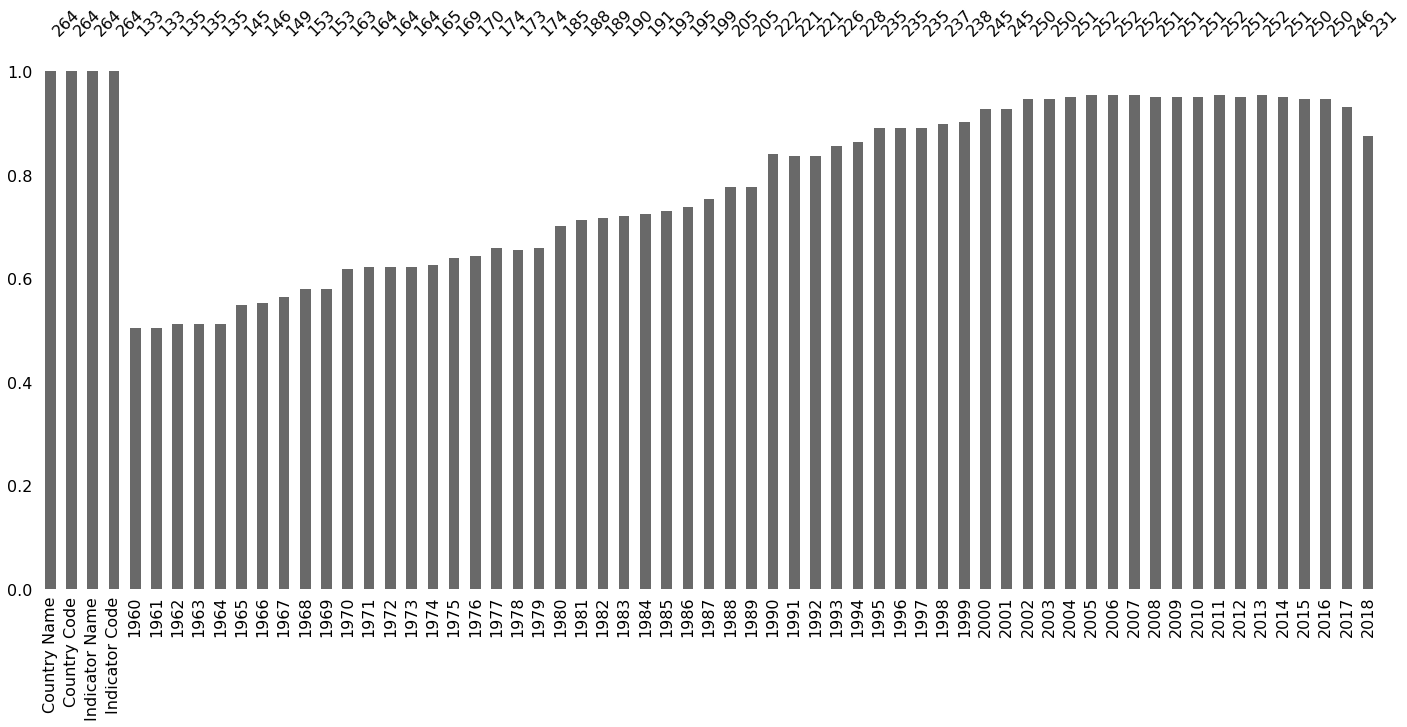

In [308]:
mno.bar(wb_gdppc_df1)

In [223]:
cols = [2,3]
wb_gdppc_df2 = wb_gdppc_df1.drop(wb_gdppc_df1.columns[cols], axis=1)
wb_gdppc_df3 = wb_gdppc_df2.rename(columns={ "Country Name": "Country", \
                                        "Country Code": "ISO_Alpha" })
wb_gdppc_df3

Country ISO_Alpha  \
0                                                   Aruba       ABW   
1                                             Afghanistan       AFG   
2                                                  Angola       AGO   
3                                                 Albania       ALB   
4                                                 Andorra       AND   
5                                              Arab World       ARB   
6                                    United Arab Emirates       ARE   
7                                               Argentina       ARG   
8                                                 Armenia       ARM   
9                                          American Samoa       ASM   
10                                    Antigua and Barbuda       ATG   
11                                              Australia       AUS   
12                                                Austria       AUT   
13                                             Azerbaijan       AZE   
14                                                Burundi       BDI   
15                                                Belgium       BEL   
16                                                  Benin       BEN   
17                                           Burkina Faso       BFA   
18                                             Bangladesh       BGD   
19                                               Bulgaria       BGR   
20                                                Bahrain       BHR   
21                                           Bahamas, The       BHS   
22                                 Bosnia and Herzegovina       BIH   
23                                                Belarus       BLR   
24                                                 Belize       BLZ   
25                                                Bermuda       BMU   
26                                                Bolivia       BOL   
27                                                 Brazil       BRA   
28                                               Barbados       BRB   
29                                      Brunei Darussalam       BRN   
30                                                 Bhutan       BTN   
31                                               Botswana       BWA   
32                               Central African Republic       CAF   
33                                                 Canada       CAN   
34                         Central Europe and the Baltics       CEB   
35                                            Switzerland       CHE   
36                                        Channel Islands       CHI   
37                                                  Chile       CHL   
38                                                  China       CHN   
39                                          Cote d'Ivoire       CIV   
40                                               Cameroon       CMR   
41                                       Congo, Dem. Rep.       COD   
42                                            Congo, Rep.       COG   
43                                               Colombia       COL   
44                                                Comoros       COM   
45                                             Cabo Verde       CPV   
46                                             Costa Rica       CRI   
47                                 Caribbean small states       CSS   
48                                                   Cuba       CUB   
49                                                Curacao       CUW   
50                                         Cayman Islands       CYM   
51                                                 Cyprus       CYP   
52                                         Czech Republic       CZE   
53                                                Germany       DEU   
54                                               Djibouti       DJI   
55                                               Dominica       DMA   
56 

### Pandas `melt`, prepare WB GDP data for merge

#### GDP data

Pandas melt normalizes the dataframe to `Year`, `Country` and `value`, the latter representing `GDP` or `GDP per capita`in US dollars.

From the `pandas melt` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html):
> *Unpivot a DataFrame from wide format to long format, optionally leaving identifier variables set.*
>  
> *This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.*

Executed as code below, from wide format to long format:

In [117]:
wb_gdp_df4 = wb_gdp_df3.melt(id_vars=['Country', 'ISO_Alpha'])

wb_gdp_df4.head()

Country ISO_Alpha variable      value
0        Aruba       ABW     1960        NaN
1  Afghanistan       AFG     1960  59.773194
2       Angola       AGO     1960        NaN
3      Albania       ALB     1960        NaN
4      Andorra       AND     1960        NaN

Let's rename `variable` to `Year` and `value` to `GDP-USD`.

In [118]:
wb_gdp_df5 = wb_gdp_df4.rename(columns={'variable': 'Year', 'value': 'GDP-USD'})

wb_gdp_df5.head()

Country ISO_Alpha  Year    GDP-USD
0        Aruba       ABW  1960        NaN
1  Afghanistan       AFG  1960  59.773194
2       Angola       AGO  1960        NaN
3      Albania       ALB  1960        NaN
4      Andorra       AND  1960        NaN

In [119]:
wb_gdp_df5.columns

Index(['Country', 'ISO_Alpha', 'Year', 'GDP-USD'], dtype='object')

In [120]:
wb_gdp_df5.dtypes

Country       object
ISO_Alpha     object
Year          object
GDP-USD      float64
dtype: object

In [121]:
wb_gdp_df5['Year'] = pd.to_numeric(wb_gdp_df5['Year'])

In [122]:
wb_gdp_df5.dtypes

Country       object
ISO_Alpha     object
Year           int64
GDP-USD      float64
dtype: object

In [123]:
wb_gdp_df5_2017 = wb_gdp_df5.query("Year==2017")

wb_gdp_df5_2017.head()

Country ISO_Alpha  Year       GDP-USD
15048        Aruba       ABW  2017  25630.266490
15049  Afghanistan       AFG  2017    556.302138
15050       Angola       AGO  2017   4095.812942
15051      Albania       ALB  2017   4532.889198
15052      Andorra       AND  2017  39134.393370

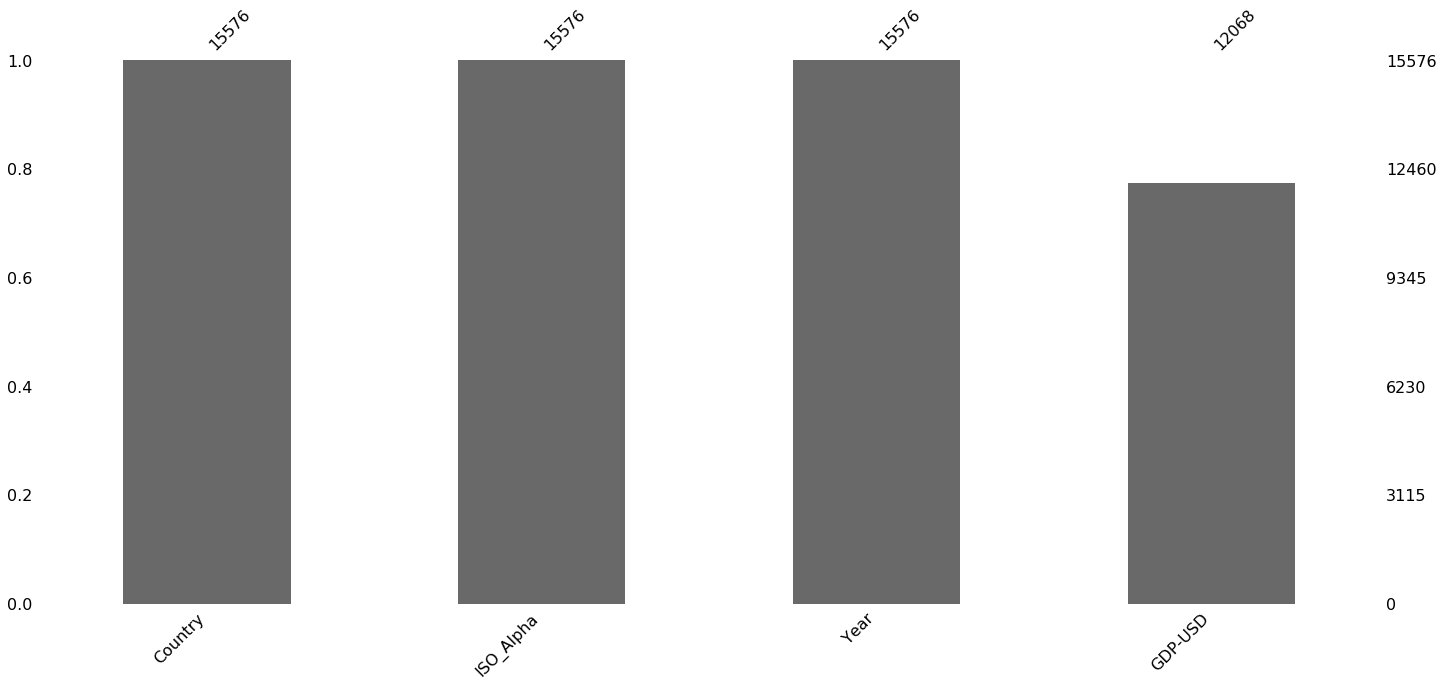

In [124]:
mno.bar(wb_gdp_df5)

#### GDP per capita data

In [224]:
wb_gdppc_df4 = wb_gdppc_df3.melt(id_vars=['Country', 'ISO_Alpha'])

wb_gdppc_df4.head()

Country ISO_Alpha variable      value
0        Aruba       ABW     1960        NaN
1  Afghanistan       AFG     1960  59.773194
2       Angola       AGO     1960        NaN
3      Albania       ALB     1960        NaN
4      Andorra       AND     1960        NaN

In [225]:
wb_gdppc_df5 = wb_gdppc_df4.rename(columns={'variable': 'Year', 'value': 'GDP-PC-USD'})

wb_gdppc_df5.head()

Country ISO_Alpha  Year  GDP-PC-USD
0        Aruba       ABW  1960         NaN
1  Afghanistan       AFG  1960   59.773194
2       Angola       AGO  1960         NaN
3      Albania       ALB  1960         NaN
4      Andorra       AND  1960         NaN

In [226]:
wb_gdppc_df5['Year'] = pd.to_numeric(wb_gdppc_df5['Year'])

In [227]:
wb_gdppc_df5_2017 = wb_gdppc_df5.query("Year==2017")

wb_gdppc_df5_2017.head()

Country ISO_Alpha  Year    GDP-PC-USD
15048        Aruba       ABW  2017  25630.266490
15049  Afghanistan       AFG  2017    556.302138
15050       Angola       AGO  2017   4095.812942
15051      Albania       ALB  2017   4532.889198
15052      Andorra       AND  2017  39134.393370

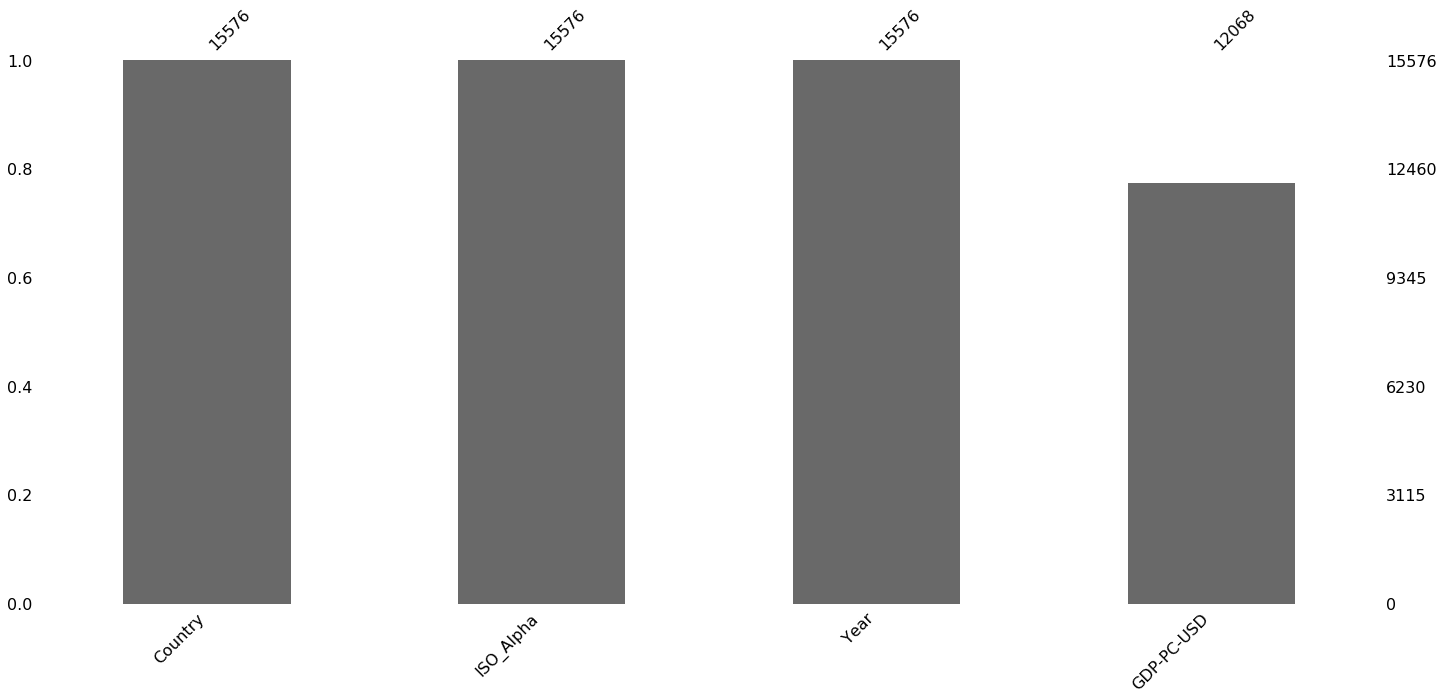

In [228]:
mno.bar(wb_gdppc_df5)

### World Bank metadata updates

In [125]:
wb_gdp_meta_df1 = pd.read_csv("resources/Metadata_Country_API_NY.GDP.PCAP.CD_DS2_en_csv_v2_123.csv")

wb_gdp_meta_df1.head()

Country Code                     Region          IncomeGroup SpecialNotes  \
0          ABW  Latin America & Caribbean          High income          NaN   
1          AFG                 South Asia           Low income          NaN   
2          AGO         Sub-Saharan Africa  Lower middle income          NaN   
3          ALB      Europe & Central Asia  Upper middle income          NaN   
4          AND      Europe & Central Asia          High income          NaN   

     TableName  Unnamed: 5  
0        Aruba         NaN  
1  Afghanistan         NaN  
2       Angola         NaN  
3      Albania         NaN  
4      Andorra         NaN

Let's rename some columns in the WB dataframe above in preparation for dataframe merge. Let's also drop the `Unnamed: 5` and  `SpecialNotes` columns.

In [126]:
wb_gdp_meta_df2 = wb_gdp_meta_df1.rename(\
        columns={'TableName': 'Country', 'Country Code': 'ISO_Alpha'})
wb_gdp_meta_df3 = wb_gdp_meta_df2.drop(['Unnamed: 5', 'SpecialNotes'], axis=1)

wb_gdp_meta_df3.head()

ISO_Alpha                     Region          IncomeGroup      Country
0       ABW  Latin America & Caribbean          High income        Aruba
1       AFG                 South Asia           Low income  Afghanistan
2       AGO         Sub-Saharan Africa  Lower middle income       Angola
3       ALB      Europe & Central Asia  Upper middle income      Albania
4       AND      Europe & Central Asia          High income      Andorra

### Check linkage column, `ISO_Alpha`, before Merge #1

Because we are going to merge WB data and metadata on the `ISO_Alpha` column, we have to check if the data from the `ISO_Alpha` columns from both dataframes match.

To do this we will construct two dataframes that we can visually inspect and compare: `wb_gdp_c1` and `wb_gdp_c2`.

In [127]:
wb_gdp_iso3 = wb_gdp_df5.ISO_Alpha.unique()
wb_gdp_country = wb_gdp_df5.Country.unique()

wb_gdp_c1 = pd.DataFrame({'ISO_Alpha':wb_gdp_iso3,'Country':wb_gdp_country})

wb_gdp_c1

ISO_Alpha                                               Country
0         ABW                                                 Aruba
1         AFG                                           Afghanistan
2         AGO                                                Angola
3         ALB                                               Albania
4         AND                                               Andorra
5         ARB                                            Arab World
6         ARE                                  United Arab Emirates
7         ARG                                             Argentina
8         ARM                                               Armenia
9         ASM                                        American Samoa
10        ATG                                   Antigua and Barbuda
11        AUS                                             Australia
12        AUT                                               Austria
13        AZE                                            Azerbaijan
14        BDI                                               Burundi
15        BEL                                               Belgium
16        BEN                                                 Benin
17        BFA                                          Burkina Faso
18        BGD                                            Bangladesh
19        BGR                                              Bulgaria
20        BHR                                               Bahrain
21        BHS                                          Bahamas, The
22        BIH                                Bosnia and Herzegovina
23        BLR                                               Belarus
24        BLZ                                                Belize
25        BMU                                               Bermuda
26        BOL                                               Bolivia
27        BRA                                                Brazil
28        BRB                                              Barbados
29        BRN                                     Brunei Darussalam
30        BTN                                                Bhutan
31        BWA                                              Botswana
32        CAF                              Central African Republic
33        CAN                                                Canada
34        CEB                        Central Europe and the Baltics
35        CHE                                           Switzerland
36        CHI                                       Channel Islands
37        CHL                                                 Chile
38        CHN                                                 China
39        CIV                                         Cote d'Ivoire
40        CMR                                              Cameroon
41        COD                                      Congo, Dem. Rep.
42        COG                                           Congo, Rep.
43        COL                                              Colombia
44        COM                                               Comoros
45        CPV                                            Cabo Verde
46        CRI                                            Costa Rica
47        CSS                                Caribbean small states
48        CUB                                                  Cuba
49        CUW                                               Curacao
50        CYM                                        Cayman Islands
51        CYP                                                Cyprus
52        CZE                                        Czech Republic
53        DEU                                               Germany
54        DJI                                              Djibouti
55        DMA                                              Dominica
56        DNK                                               Denmark
57        DOM                                    Dominican R

In [128]:
wb_gdp_meta_iso3 = wb_gdp_meta_df3.ISO_Alpha.unique()
wb_gdp_meta_country = wb_gdp_meta_df3.Country.unique()

wb_gdp_c2 = pd.DataFrame({'ISO_Alpha':wb_gdp_meta_iso3,'Country':wb_gdp_meta_country})

wb_gdp_c2

ISO_Alpha                                             Country
0         ABW                                               Aruba
1         AFG                                         Afghanistan
2         AGO                                              Angola
3         ALB                                             Albania
4         AND                                             Andorra
5         ARB                                          Arab World
6         ARE                                United Arab Emirates
7         ARG                                           Argentina
8         ARM                                             Armenia
9         ASM                                      American Samoa
10        ATG                                 Antigua and Barbuda
11        AUS                                           Australia
12        AUT                                             Austria
13        AZE                                          Azerbaijan
14        BDI                                             Burundi
15        BEL                                             Belgium
16        BEN                                               Benin
17        BFA                                        Burkina Faso
18        BGD                                          Bangladesh
19        BGR                                            Bulgaria
20        BHR                                             Bahrain
21        BHS                                        Bahamas, The
22        BIH                              Bosnia and Herzegovina
23        BLR                                             Belarus
24        BLZ                                              Belize
25        BMU                                             Bermuda
26        BOL                                             Bolivia
27        BRA                                              Brazil
28        BRB                                            Barbados
29        BRN                                   Brunei Darussalam
30        BTN                                              Bhutan
31        BWA                                            Botswana
32        CAF                            Central African Republic
33        CAN                                              Canada
34        CEB                      Central Europe and the Baltics
35        CHE                                         Switzerland
36        CHI                                     Channel Islands
37        CHL                                               Chile
38        CHN                                               China
39        CIV                                       Côte d'Ivoire
40        CMR                                            Cameroon
41        COD                                    Congo, Dem. Rep.
42        COG                                         Congo, Rep.
43        COL                                            Colombia
44        COM                                             Comoros
45        CPV                                          Cabo Verde
46        CRI                                          Costa Rica
47        CSS                              Caribbean small states
48        CUB                                                Cuba
49        CUW                                             Curaçao
50        CYM                                      Cayman Islands
51        CYP                                              Cyprus
52        CZE                                      Czech Republic
53        DEU                                             Germany
54        DJI                                            Djibouti
55        DMA                                            Dominica
56        DNK                                             Denmark
57        DOM                                  Dominican Republic
58        DZA                                             Algeria
59        EAP         East Asia & Pacific (e

Using a `numpy` dot function called `setdiff1d()`, let's check which `Country` names `ISO_Alpha` codes don't overlap between WB GDP data and metadata.

In [189]:
wb_nonmatch = np.setdiff1d(wb_gdp_iso3, wb_gdp_meta_iso3)

wb_nonmatch

array(['INX'], dtype=object)

If you check The value `INX` does not represent a country.

#### Pickle WB dataframes

In [229]:
wb_gdp_df5.to_pickle('outputs/wb_gdp_df5.pickle')
wb_gdppc_df5.to_pickle('outputs/wb_gdppc_df5.pickle')
wb_gdp_meta_df3.to_pickle('outputs/wb_gdp_meta_df3.pickle')

### 3. WB Education Data, 1960-2018

From the World Bank education page (link below):

> *"Education is one of the most powerful instruments for reducing poverty and inequality and lays a foundation for sustained economic growth. The World Bank compiles data on education inputs, participation, efficiency, and outcomes. Data on education are compiled by the United Nations Educational, Scientific, and Cultural Organization (UNESCO) Institute for Statistics from official responses to surveys and from reports provided by education authorities in each country."*

1. Source: http://api.worldbank.org/v2/en/topic/4?downloadformat=csv (version: 7/10/2019)
2. License: https://datacatalog.worldbank.org/public-licenses#cc-by
3. Note: The downloaded zip file has 3 CSV files: data, metadata and indicator metatadata (first two are used here). The data CSV file has 4 rows at the top that should be deleted. The metadata file has complete descriptions of indicators, including data sources (see below).

### Aggregate data, WB education indicators

In [131]:
wb_ed_df1 = pd.read_csv('resources/API_4_DS2_en_csv_v2_48246 V2.csv')

wb_ed_df1.head(30)

Country Name Country Code  \
0         Aruba          ABW   
1         Aruba          ABW   
2         Aruba          ABW   
3         Aruba          ABW   
4         Aruba          ABW   
5         Aruba          ABW   
6         Aruba          ABW   
7         Aruba          ABW   
8         Aruba          ABW   
9         Aruba          ABW   
10        Aruba          ABW   
11        Aruba          ABW   
12        Aruba          ABW   
13        Aruba          ABW   
14        Aruba          ABW   
15        Aruba          ABW   
16        Aruba          ABW   
17        Aruba          ABW   
18        Aruba          ABW   
19        Aruba          ABW   
20        Aruba          ABW   
21        Aruba          ABW   
22        Aruba          ABW   
23        Aruba          ABW   
24        Aruba          ABW   
25        Aruba          ABW   
26        Aruba          ABW   
27        Aruba          ABW   
28        Aruba          ABW   
29        Aruba          ABW   

                                                                                              Indicator Name  \
0                                                              Population ages 15-64 (% of total population)   
1                                                               Population ages 0-14 (% of total population)   
2                                        Unemployment, total (% of total labor force) (modeled ILO estimate)   
3                                          Unemployment, male (% of male labor force) (modeled ILO estimate)   
4                                      Unemployment, female (% of female labor force) (modeled ILO estimate)   
5                                                                                         Labor force, total   
6                                                               Labor force, female (% of total labor force)   
7                                                      Government expenditure on education, total (% of GDP)   
8                                   Government expenditure on education, total (% of government expenditure)   
9                               Expenditure on tertiary education (% of government expenditure on education)   
10                                        Government expenditure per student, tertiary (% of GDP per capita)   
11                             Expenditure on secondary education (% of government expenditure on education)   
12                                       Government expenditure per student, secondary (% of GDP per capita)   
13                               Expenditure on primary education (% of government expenditure on education)   
14                                         Government expenditure per student, primary (% of GDP per capita)   
15                      Current education expenditure, total (% of total expenditure in public institutions)   
16          Current education expenditure, tertiary (% of total expenditure in tertiary public institutions)   
17        Current education expenditure, secondary (% of total expenditure in secondary public institutions)   
18            Current education expenditure, primary (% of total expenditure in primary public institutions)   
19                                                             Tertiary education, academic staff (% female)   
20                                                               School enrollment, tertiary, male (% gross)   
21                                                             School enrollment, tertiary, female (% gross)   
22                                                                     School enrollment, tertiary (% gross)   
23                                                                             Pupil-teacher ratio, tertiary   
24   Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)   
25    Educational attainment, at least completed short-cycle tertiary, population 25+, male (%) (c

### Indicator metadata, WB education indicators

In [317]:
wb_edmeta_df1 = \
  pd.read_csv('resources/Metadata_Indicator_API_4_DS2_en_csv_v2_48246.csv').\
    drop(['Unnamed: 4'], axis=1)

wb_edmeta_df1.head(160)

INDICATOR_CODE  \
0       SP.POP.1564.TO.ZS   
1       SP.POP.0014.TO.ZS   
2          SL.UEM.TOTL.ZS   
3       SL.UEM.TOTL.MA.ZS   
4       SL.UEM.TOTL.FE.ZS   
5          SL.TLF.TOTL.IN   
6       SL.TLF.TOTL.FE.ZS   
7       SE.XPD.TOTL.GD.ZS   
8       SE.XPD.TOTL.GB.ZS   
9          SE.XPD.TERT.ZS   
10      SE.XPD.TERT.PC.ZS   
11         SE.XPD.SECO.ZS   
12      SE.XPD.SECO.PC.ZS   
13         SE.XPD.PRIM.ZS   
14      SE.XPD.PRIM.PC.ZS   
15         SE.XPD.CTOT.ZS   
16         SE.XPD.CTER.ZS   
17         SE.XPD.CSEC.ZS   
18         SE.XPD.CPRM.ZS   
19      SE.TER.TCHR.FE.ZS   
20         SE.TER.ENRR.MA   
21         SE.TER.ENRR.FE   
22            SE.TER.ENRR   
23      SE.TER.ENRL.TC.ZS   
24      SE.TER.CUAT.ST.ZS   
25   SE.TER.CUAT.ST.MA.ZS   
26   SE.TER.CUAT.ST.FE.ZS   
27      SE.TER.CUAT.MS.ZS   
28   SE.TER.CUAT.MS.MA.ZS   
29   SE.TER.CUAT.MS.FE.ZS   
30      SE.TER.CUAT.DO.ZS   
31   SE.TER.CUAT.DO.MA.ZS   
32   SE.TER.CUAT.DO.FE.ZS   
33      SE.TER.CUAT.BA.ZS   
34   SE.TER.CUAT.BA.MA.ZS   
35   SE.TER.CUAT.BA.FE.ZS   
36      SE.SEC.UNER.LO.ZS   
37   SE.SEC.UNER.LO.MA.ZS   
38   SE.SEC.UNER.LO.FE.ZS   
39      SE.SEC.TCHR.FE.ZS   
40         SE.SEC.TCHR.FE   
41            SE.SEC.TCHR   
42         SE.SEC.TCAQ.ZS   
43      SE.SEC.TCAQ.UP.ZS   
44   SE.SEC.TCAQ.UP.MA.ZS   
45   SE.SEC.TCAQ.UP.FE.ZS   
46      SE.SEC.TCAQ.MA.ZS   
47      SE.SEC.TCAQ.LO.ZS   
48   SE.SEC.TCAQ.LO.MA.ZS   
49   SE.SEC.TCAQ.LO.FE.ZS   
50      SE.SEC.TCAQ.FE.ZS   
51         SE.SEC.PROG.ZS   
52      SE.SEC.PROG.MA.ZS   
53      SE.SEC.PROG.FE.ZS   
54         SE.SEC.PRIV.ZS   
55         SE.SEC.NENR.MA   
56         SE.SEC.NENR.FE   
57            SE.SEC.NENR   
58         SE.SEC.ENRR.MA   
59         SE.SEC.ENRR.FE   
60            SE.SEC.ENRR   
61   SE.SEC.ENRL.VO.FE.ZS   
62         SE.SEC.ENRL.VO   
63   SE.SEC.ENRL.UP.TC.ZS   
64      SE.SEC.ENRL.TC.ZS   
65   SE.SEC.ENRL.LO.TC.ZS   
66   SE.SEC.ENRL.GC.FE.ZS   
67         SE.SEC.ENRL.GC   
68      SE.SEC.ENRL.FE.ZS   
69            SE.SEC.ENRL   
70            SE.SEC.DURS   
71      SE.SEC.CUAT.UP.ZS   
72   SE.SEC.CUAT.UP.MA.ZS   
73   SE.SEC.CUAT.UP.FE.ZS   
74      SE.SEC.CUAT.PO.ZS   
75   SE.SEC.CUAT.PO.MA.ZS   
76   SE.SEC.CUAT.PO.FE.ZS   
77      SE.SEC.CUAT.LO.ZS   
78   SE.SEC.CUAT.LO.MA.ZS   
79   SE.SEC.CUAT.LO.FE.ZS   
80      SE.SEC.CMPT.LO.ZS   
81   SE.SEC.CMPT.LO.MA.ZS   
82   SE.SEC.CMPT.LO.FE.ZS   
83            SE.SEC.AGES   
84         SE.PRM.UNER.ZS   
85      SE.PRM.UNER.MA.ZS   
86         SE.PRM.UNER.MA   
87      SE.PRM.UNER.FE.ZS   
88         SE.PRM.UNER.FE   
89            SE.PRM.UNER   
90         SE.PRM.TENR.MA   
91         SE.PRM.TENR.FE   
92            SE.PRM.TENR   
93      SE.PRM.TCHR.FE.ZS   
94            SE.PRM.TCHR   
95         SE.PRM.TCAQ.ZS   
96      SE.PRM.TCAQ.MA.ZS   
97      SE.PRM.TCAQ.FE.ZS   
98         SE.PRM.REPT.ZS   
99      SE.PRM.REPT.MA.ZS   
100     SE.PRM.REPT.FE.ZS   
101        SE.PRM.PRSL.ZS   
102     SE.PRM.PRSL.MA.ZS   
103     SE.PRM.PRSL.FE.ZS   
104        SE.PRM.PRS5.ZS   
105     SE.PRM.PRS5.MA.ZS   
106     SE.PRM.PRS5.FE.ZS   
107        SE.PRM.PRIV.ZS   
108        SE.PRM.OENR.ZS   
109     SE.PRM.OENR.MA.ZS   
110     SE.PRM.OENR.FE.ZS   
111        SE.PRM.NINT.ZS   
112     SE.PRM.NINT.MA.ZS   
113     SE.PRM.NINT.FE.ZS   
114        SE.PRM.NENR.MA   
115        SE.PRM.NENR.FE   
116           SE.PRM.NENR   
117        SE.PRM.GINT.ZS   
118     SE.PRM.GINT.MA.ZS   
119     SE.PRM.GINT.FE.ZS   
120        SE.PRM.ENRR.MA   
121        SE.PRM.ENRR.FE   
122           SE.PRM.ENRR   
123     SE.PRM.ENRL.TC.ZS   
124     SE.PRM.ENRL.FE.ZS   
125           SE.PRM.ENRL   
126           SE.PRM.DURS   
127        SE.PRM.CUAT.ZS   
128     SE.PRM.CUAT.MA.ZS   
129     SE.PRM.CUAT.FE.ZS   
130        SE.PRM.CMPT.ZS   
131     SE.PRM.CMPT.MA.ZS   
132     SE.PRM.CMPT.FE.ZS   
133           SE.PRM.AGES   
134        SE.PRE.TCAQ.ZS   
135     SE.PRE.TCAQ.MA.ZS   
136     SE.PRE.TCAQ.FE.ZS   
137      

Let's rename some columns of the education data set. Note that this data set has several indicators referenced in the metadata data above.

In [314]:
wb_ed_df2 = wb_ed_df1.rename(columns={ "Country Name": "Country", \
                                        "Country Code": "ISO_Alpha", \
                                       "Indicator Name": "Indicator_Name", \
                                       "Indicator Code": "Indicator_Code"})
wb_ed_df2.head(30)

Country ISO_Alpha  \
0    Aruba       ABW   
1    Aruba       ABW   
2    Aruba       ABW   
3    Aruba       ABW   
4    Aruba       ABW   
5    Aruba       ABW   
6    Aruba       ABW   
7    Aruba       ABW   
8    Aruba       ABW   
9    Aruba       ABW   
10   Aruba       ABW   
11   Aruba       ABW   
12   Aruba       ABW   
13   Aruba       ABW   
14   Aruba       ABW   
15   Aruba       ABW   
16   Aruba       ABW   
17   Aruba       ABW   
18   Aruba       ABW   
19   Aruba       ABW   
20   Aruba       ABW   
21   Aruba       ABW   
22   Aruba       ABW   
23   Aruba       ABW   
24   Aruba       ABW   
25   Aruba       ABW   
26   Aruba       ABW   
27   Aruba       ABW   
28   Aruba       ABW   
29   Aruba       ABW   

                                                                                              Indicator_Name  \
0                                                              Population ages 15-64 (% of total population)   
1                                                               Population ages 0-14 (% of total population)   
2                                        Unemployment, total (% of total labor force) (modeled ILO estimate)   
3                                          Unemployment, male (% of male labor force) (modeled ILO estimate)   
4                                      Unemployment, female (% of female labor force) (modeled ILO estimate)   
5                                                                                         Labor force, total   
6                                                               Labor force, female (% of total labor force)   
7                                                      Government expenditure on education, total (% of GDP)   
8                                   Government expenditure on education, total (% of government expenditure)   
9                               Expenditure on tertiary education (% of government expenditure on education)   
10                                        Government expenditure per student, tertiary (% of GDP per capita)   
11                             Expenditure on secondary education (% of government expenditure on education)   
12                                       Government expenditure per student, secondary (% of GDP per capita)   
13                               Expenditure on primary education (% of government expenditure on education)   
14                                         Government expenditure per student, primary (% of GDP per capita)   
15                      Current education expenditure, total (% of total expenditure in public institutions)   
16          Current education expenditure, tertiary (% of total expenditure in tertiary public institutions)   
17        Current education expenditure, secondary (% of total expenditure in secondary public institutions)   
18            Current education expenditure, primary (% of total expenditure in primary public institutions)   
19                                                             Tertiary education, academic staff (% female)   
20                                                               School enrollment, tertiary, male (% gross)   
21                                                             School enrollment, tertiary, female (% gross)   
22                                                                     School enrollment, tertiary (% gross)   
23                                                                             Pupil-teacher ratio, tertiary   
24   Educational attainment, at least completed short-cycle tertiary, population 25+, total (%) (cumulative)   
25    Educational attainment, at least completed short-cycle tertiary, population 25+, male (%) (cumulative)   
26  Educational attainment, at least completed short-cycle tertiary, population 25+, female (%) (cumulative)   
27           Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)   
28        

### Education data subsets

The education data set contains many indicators. We will pick one indicator to merge with other GDP indicators.

#### Primary completion rate

Let's query the metadata for a full description of the primary completion rate indicator. (Note: You can apply the same steps to other education indicators found in the data set.

In [297]:
# first line disables the column width default so we can see
#   the full text of `SOURCE NOTES` column
# the second line prints the row corresponding to the indicator code
#   for primary completion rate
with pd.option_context('display.max_colwidth', -1): 
    print(wb_edmeta_df1.query("INDICATOR_CODE=='SE.PRM.CMPT.ZS'"))

     INDICATOR_CODE                                            INDICATOR_NAME  \
130  SE.PRM.CMPT.ZS  Primary completion rate, total (% of relevant age group)   

                                                                                                                                                                                                                                                                                                                                                                                                        SOURCE_NOTE  \
130  Primary completion rate, or gross intake ratio to the last grade of primary education, is the number of new entrants (enrollments minus repeaters) in the last grade of primary education, regardless of age, divided by the population at the entrance age for the last grade of primary education. Data limitations preclude adjusting for students who drop out during the final year of primary education.   

                      

In [294]:
wb_ed_primcomp_df1 = wb_ed_df2.query("Indicator_Code=='SE.PRM.CMPT.ZS'")

wb_ed_primcomp_df1

Country ISO_Alpha  \
130                                                   Aruba       ABW   
284                                             Afghanistan       AFG   
438                                                  Angola       AGO   
592                                                 Albania       ALB   
746                                                 Andorra       AND   
900                                              Arab World       ARB   
1054                                   United Arab Emirates       ARE   
1208                                              Argentina       ARG   
1362                                                Armenia       ARM   
1516                                         American Samoa       ASM   
1670                                    Antigua and Barbuda       ATG   
1824                                              Australia       AUS   
1978                                                Austria       AUT   
2132                                             Azerbaijan       AZE   
2286                                                Burundi       BDI   
2440                                                Belgium       BEL   
2594                                                  Benin       BEN   
2748                                           Burkina Faso       BFA   
2902                                             Bangladesh       BGD   
3056                                               Bulgaria       BGR   
3210                                                Bahrain       BHR   
3364                                           Bahamas, The       BHS   
3518                                 Bosnia and Herzegovina       BIH   
3672                                                Belarus       BLR   
3826                                                 Belize       BLZ   
3980                                                Bermuda       BMU   
4134                                                Bolivia       BOL   
4288                                                 Brazil       BRA   
4442                                               Barbados       BRB   
4596                                      Brunei Darussalam       BRN   
4750                                                 Bhutan       BTN   
4904                                               Botswana       BWA   
5058                               Central African Republic       CAF   
5212                                                 Canada       CAN   
5366                         Central Europe and the Baltics       CEB   
5520                                            Switzerland       CHE   
5674                                        Channel Islands       CHI   
5828                                                  Chile       CHL   
5982                                                  China       CHN   
6136                                          Cote d'Ivoire       CIV   
6290                                               Cameroon       CMR   
6444                                       Congo, Dem. Rep.       COD   
6598                                            Congo, Rep.       COG   
6752                                               Colombia       COL   
6906                                                Comoros       COM   
7060                                             Cabo Verde       CPV   
7214                                             Costa Rica       CRI   
7368                                 Caribbean small states       CSS   
7522                                                   Cuba       CUB   
7676                                                Curacao       CUW   
7830                                         Cayman Islands       CYM   
7984                                                 Cyprus       CYP   
8138                                         Czech Republic       CZE   
8292                                                Germany       DEU   
8446                                 

Let's use `missingo` with alias `mno` to inspect missing values for this indicator across years of data collection.

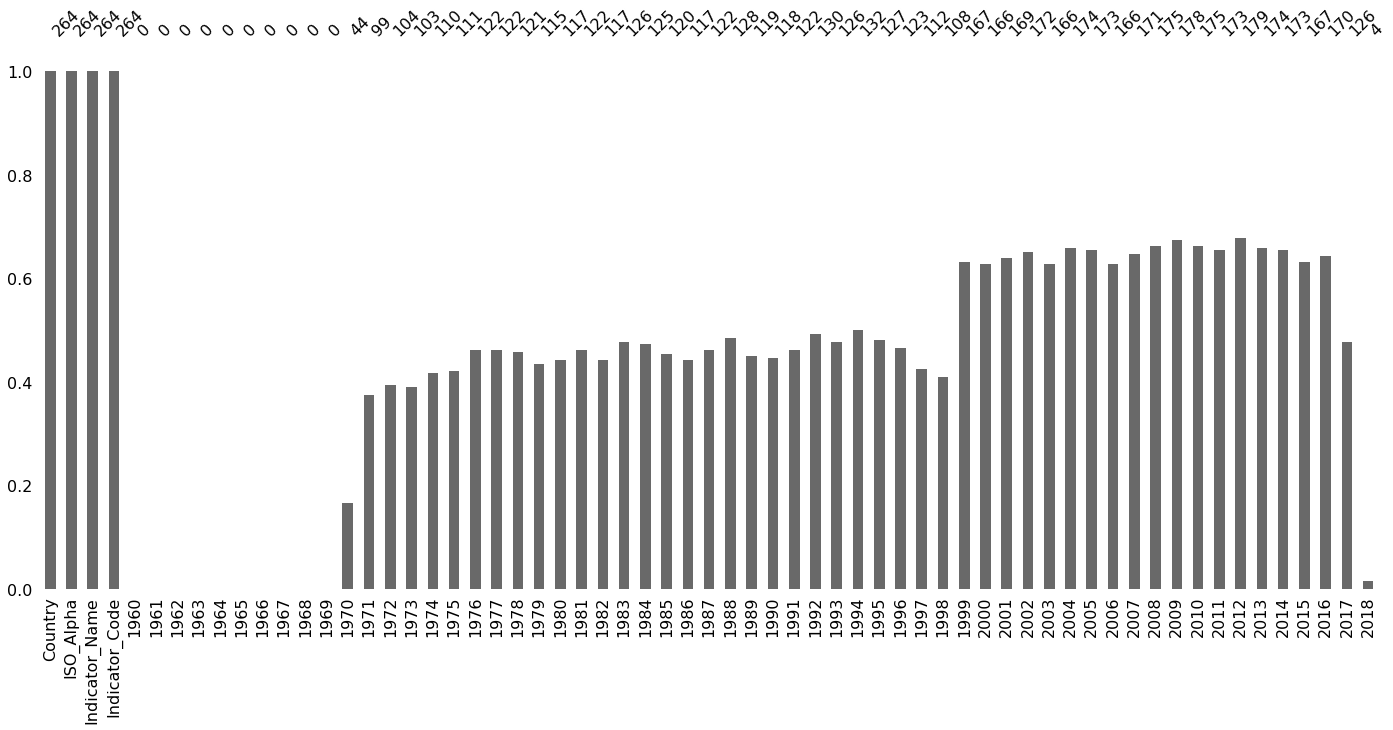

In [295]:
mno.bar(wb_ed_primcomp_df1)

This data set being a subset for primary completion rate indicator, we will not need the Indicator_Code and Indicator_Name columns so we drop these using the code below.

In [299]:
cols = [2,3]
wb_ed_primcomp_df2 = wb_ed_primcomp_df1.drop(wb_ed_primcomp_df1.columns[cols],axis=1)

wb_ed_primcomp_df2

Country ISO_Alpha  1960  \
130                                                   Aruba       ABW   NaN   
284                                             Afghanistan       AFG   NaN   
438                                                  Angola       AGO   NaN   
592                                                 Albania       ALB   NaN   
746                                                 Andorra       AND   NaN   
900                                              Arab World       ARB   NaN   
1054                                   United Arab Emirates       ARE   NaN   
1208                                              Argentina       ARG   NaN   
1362                                                Armenia       ARM   NaN   
1516                                         American Samoa       ASM   NaN   
1670                                    Antigua and Barbuda       ATG   NaN   
1824                                              Australia       AUS   NaN   
1978                                                Austria       AUT   NaN   
2132                                             Azerbaijan       AZE   NaN   
2286                                                Burundi       BDI   NaN   
2440                                                Belgium       BEL   NaN   
2594                                                  Benin       BEN   NaN   
2748                                           Burkina Faso       BFA   NaN   
2902                                             Bangladesh       BGD   NaN   
3056                                               Bulgaria       BGR   NaN   
3210                                                Bahrain       BHR   NaN   
3364                                           Bahamas, The       BHS   NaN   
3518                                 Bosnia and Herzegovina       BIH   NaN   
3672                                                Belarus       BLR   NaN   
3826                                                 Belize       BLZ   NaN   
3980                                                Bermuda       BMU   NaN   
4134                                                Bolivia       BOL   NaN   
4288                                                 Brazil       BRA   NaN   
4442                                               Barbados       BRB   NaN   
4596                                      Brunei Darussalam       BRN   NaN   
4750                                                 Bhutan       BTN   NaN   
4904                                               Botswana       BWA   NaN   
5058                               Central African Republic       CAF   NaN   
5212                                                 Canada       CAN   NaN   
5366                         Central Europe and the Baltics       CEB   NaN   
5520                                            Switzerland       CHE   NaN   
5674                                        Channel Islands       CHI   NaN   
5828                                                  Chile       CHL   NaN   
5982                                                  China       CHN   NaN   
6136                                          Cote d'Ivoire       CIV   NaN   
6290                                               Cameroon       CMR   NaN   
6444                                       Congo, Dem. Rep.       COD   NaN   
6598                                            Congo, Rep.       COG   NaN   
6752                                               Colombia       COL   NaN   
6906                                                Comoros       COM   NaN   
7060                                             Cabo Verde       CPV   NaN   
7214                                             Costa Rica       CRI   NaN   
7368                                 Caribbean small states       CSS   NaN   
7522                                                   Cuba       CUB   NaN   
7676                                                Curacao       CUW   NaN   
7830                   

### Pandas `melt`, prepare WB education data for merge

#### Primary completion rate

In [247]:
wb_ed_primcomp_df3 = wb_ed_primcomp_df2.melt(\
            id_vars=['Country', 'ISO_Alpha'])

wb_ed_primcomp_df3.head(200)

Country ISO_Alpha variable  \
0                                                 Aruba       ABW     1960   
1                                           Afghanistan       AFG     1960   
2                                                Angola       AGO     1960   
3                                               Albania       ALB     1960   
4                                               Andorra       AND     1960   
5                                            Arab World       ARB     1960   
6                                  United Arab Emirates       ARE     1960   
7                                             Argentina       ARG     1960   
8                                               Armenia       ARM     1960   
9                                        American Samoa       ASM     1960   
10                                  Antigua and Barbuda       ATG     1960   
11                                            Australia       AUS     1960   
12                                              Austria       AUT     1960   
13                                           Azerbaijan       AZE     1960   
14                                              Burundi       BDI     1960   
15                                              Belgium       BEL     1960   
16                                                Benin       BEN     1960   
17                                         Burkina Faso       BFA     1960   
18                                           Bangladesh       BGD     1960   
19                                             Bulgaria       BGR     1960   
20                                              Bahrain       BHR     1960   
21                                         Bahamas, The       BHS     1960   
22                               Bosnia and Herzegovina       BIH     1960   
23                                              Belarus       BLR     1960   
24                                               Belize       BLZ     1960   
25                                              Bermuda       BMU     1960   
26                                              Bolivia       BOL     1960   
27                                               Brazil       BRA     1960   
28                                             Barbados       BRB     1960   
29                                    Brunei Darussalam       BRN     1960   
30                                               Bhutan       BTN     1960   
31                                             Botswana       BWA     1960   
32                             Central African Republic       CAF     1960   
33                                               Canada       CAN     1960   
34                       Central Europe and the Baltics       CEB     1960   
35                                          Switzerland       CHE     1960   
36                                      Channel Islands       CHI     1960   
37                                                Chile       CHL     1960   
38                                                China       CHN     1960   
39                                        Cote d'Ivoire       CIV     1960   
40                                             Cameroon       CMR     1960   
41                                     Congo, Dem. Rep.       COD     1960   
42                                          Congo, Rep.       COG     1960   
43                                             Colombia       COL     1960   
44                                              Comoros       COM     1960   
45                                           Cabo Verde       CPV     1960   
46                                           Costa Rica       CRI     1960   
47                               Caribbean small states       CSS     1960   
48                                                 Cuba       CUB     1960   
49                                              Curacao       CUW     1960   
50                                       Cayman Islands       CYM     

In [248]:
wb_ed_primcomp_df4 = \
    wb_ed_primcomp_df3.rename(columns={'variable': 'Year', 'value':'Value'})
wb_ed_primcomp_df4['Year'] = pd.to_numeric(wb_ed_primcomp_df4['Year'])

wb_ed_primcomp_df4.head()

Country ISO_Alpha  Year  Value
0        Aruba       ABW  1960    NaN
1  Afghanistan       AFG  1960    NaN
2       Angola       AGO  1960    NaN
3      Albania       ALB  1960    NaN
4      Andorra       AND  1960    NaN

### Visually explore "pivoted" dataframes

#### Primary education completion rate

From the `pandas pivot` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html):
> *Return reshaped DataFrame organized by given index / column values.*
>  
> *Reshape data (produce a “pivot” table) based on column values. Uses unique values from specified index / columns to form axes of the resulting DataFrame. This function does not support data aggregation, multiple values will result in a MultiIndex in the columns. See the User Guide for more on reshaping.*

Executed as code below, from long format to wide format:

In [300]:
wb_ed_primcomp_pivot_df4 = \
    wb_ed_primcomp_df4.pivot(index='Year', columns='Country', values='Value')

wb_ed_primcomp_pivot_df4.head()

Country  Afghanistan  Albania  Algeria  American Samoa  Andorra  Angola  \
Year                                                                      
1960             NaN      NaN      NaN             NaN      NaN     NaN   
1961             NaN      NaN      NaN             NaN      NaN     NaN   
1962             NaN      NaN      NaN             NaN      NaN     NaN   
1963             NaN      NaN      NaN             NaN      NaN     NaN   
1964             NaN      NaN      NaN             NaN      NaN     NaN   

Country  Antigua and Barbuda  Arab World  Argentina  Armenia  Aruba  \
Year                                                                  
1960                     NaN         NaN        NaN      NaN    NaN   
1961                     NaN         NaN        NaN      NaN    NaN   
1962                     NaN         NaN        NaN      NaN    NaN   
1963                     NaN         NaN        NaN      NaN    NaN   
1964                     NaN         NaN        NaN      NaN    NaN   

Country  Australia  Austria  Azerbaijan  Bahamas, The  Bahrain  Bangladesh  \
Year                                                                         
1960           NaN      NaN         NaN           NaN      NaN         NaN   
1961           NaN      NaN         NaN           NaN      NaN         NaN   
1962           NaN      NaN         NaN           NaN      NaN         NaN   
1963           NaN      NaN         NaN           NaN      NaN         NaN   
1964           NaN      NaN         NaN           NaN      NaN         NaN   

Country  Barbados  Belarus  Belgium  Belize  Benin  Bermuda  Bhutan  Bolivia  \
Year                                                                           
1960          NaN      NaN      NaN     NaN    NaN      NaN     NaN      NaN   
1961          NaN      NaN      NaN     NaN    NaN      NaN     NaN      NaN   
1962          NaN      NaN      NaN     NaN    NaN      NaN     NaN      NaN   
1963          NaN      NaN      NaN     NaN    NaN      NaN     NaN      NaN   
1964          NaN      NaN      NaN     NaN    NaN      NaN     NaN      NaN   

Country  Bosnia and Herzegovina  Botswana  Brazil  British Virgin Islands  \
Year                                                                        
1960                        NaN       NaN     NaN                     NaN   
1961                        NaN       NaN     NaN                     NaN   
1962                        NaN       NaN     NaN                     NaN   
1963                        NaN       NaN     NaN                     NaN   
1964                        NaN       NaN     NaN                     NaN   

Country  Brunei Darussalam  Bulgaria  Burkina Faso  Burundi  Cabo Verde  \
Year                                                                      
1960                   NaN       NaN           NaN      NaN         NaN   
1961                   NaN       NaN           NaN      NaN         NaN   
1962                   NaN       NaN           NaN      NaN         NaN   
1963                   NaN       NaN           NaN      NaN         NaN   
1964                   NaN       NaN           NaN      NaN         NaN   

Country  Cambodia  Cameroon  Canada  Caribbean small states  Cayman Islands  \
Year                                                                          
1960          NaN       NaN     NaN                     NaN             NaN   
1961          NaN       NaN     NaN                     NaN             NaN   
1962          NaN       NaN     NaN                     NaN             NaN   
1963          NaN       NaN     NaN                     NaN             NaN   
1964          NaN       NaN     NaN                     NaN             NaN   

Country  Central African Republic  Central Europe and the Baltics  Chad  \
Year                                                                      
1960                          NaN                             NaN   NaN   
1961                   

Text(0, 0.5, 'Completion Rate')

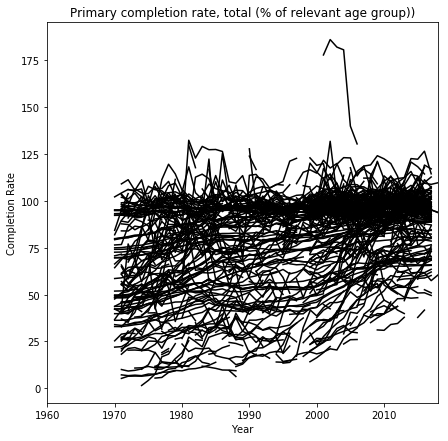

In [252]:
ax = wb_ed_primcomp_pivot_df4.plot(\
    legend=False, \
    color=['black'], \
    figsize=(7,7),\
    title='Primary completion rate, total (% of relevant age group))')
ax.set_xlabel("Year")
ax.set_ylabel("Completion Rate")

Let's look at those countries with completion rate > 125.

In [253]:
wb_ed_primcomp_df4.query("Value>125")

Country ISO_Alpha  Year       Value
5666     Kiribati       KIR  1981  132.345017
5781        Tonga       TON  1981  129.578537
6194     Kiribati       KIR  1983  129.071426
6458     Kiribati       KIR  1984  127.299927
6722     Kiribati       KIR  1985  127.434311
6986     Kiribati       KIR  1986  126.363640
7029    Mauritius       MUS  1986  125.323357
8157        Tonga       TON  1990  127.770699
10974    Maldives       MDV  2001  177.848923
11111     Belarus       BLR  2002  131.797378
11238    Maldives       MDV  2002  186.054626
11502    Maldives       MDV  2003  182.043426
11766    Maldives       MDV  2004  180.585571
12030    Maldives       MDV  2005  139.896317
12294    Maldives       MDV  2006  130.396484
15008  Seychelles       SYC  2016  126.518883

#### Pickle WB education data

In [301]:
wb_ed_df4.to_pickle('outputs/wb_ed_df4.pickle')
wb_edmeta_df1.to_pickle('outputs/wb_edmeta_df1.pickle')
wb_ed_primcomp_df4.to_pickle('outputs/wb_ed_primcomp_df4.pickle')

### 4. WB data on health care per capita spending, 1960-2018

1. Source: http://api.worldbank.org/v2/en/indicator/SH.XPD.CHEX.PC.CD?downloadformat=csv (version: 7/10/2019)
2. License: https://datacatalog.worldbank.org/public-licenses#cc-by
3. Note: The downloaded zip file has 3 CSV files: data, metadata and indicator metatadata (first two are used here). The data CSV file has 4 rows at the top that should be deleted. You can further explore which columns actually have data (columns for earlier years might be empty for all countries).

#### Aggregate data, health care per capita spending

In [302]:
wb_hcpcs_df1 = pd.read_csv('resources/API_SH.XPD.CHEX.PC.CD_DS2_en_csv_v2_41516 V2.csv')

wb_hcpcs_df1.head()

Country Name Country Code  \
0        Aruba          ABW   
1  Afghanistan          AFG   
2       Angola          AGO   
3      Albania          ALB   
4      Andorra          AND   

                                        Indicator Name     Indicator Code  \
0  Current health expenditure per capita (current US$)  SH.XPD.CHEX.PC.CD   
1  Current health expenditure per capita (current US$)  SH.XPD.CHEX.PC.CD   
2  Current health expenditure per capita (current US$)  SH.XPD.CHEX.PC.CD   
3  Current health expenditure per capita (current US$)  SH.XPD.CHEX.PC.CD   
4  Current health expenditure per capita (current US$)  SH.XPD.CHEX.PC.CD   

   1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  1970  1971  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  1983  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  1995  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1996  1997  1998  1999         2000         2001         2002         2003  \
0   NaN   NaN   NaN   NaN          NaN          NaN          NaN          NaN   
1   NaN   NaN   NaN   NaN          NaN          NaN    16.249542    17.490737   
2   NaN   NaN   NaN   NaN    12.963033    28.854245    28.961365    34.718297   
3   NaN   NaN   NaN   NaN    75.531472    81.946417    89.858329   113.583982   
4   NaN   NaN   NaN   NaN  2050.647513  2081.275330  2256.349073  2774.089627   

          2004         2005         2006         2007         2008  \
0          NaN          NaN          NaN          NaN          NaN   
1    20.927087    24.446512    28.416662    31.840183    38.700492   
2    49.526718    53.930701    69.424700    92.452016   135.208309   
3   151.980517   165.865512   172.795596   216.413135   239.684351   
4  3161.482406  3536.122706  3689.705702  4094.544269  4201.729595   

          2009         2010         2011         2012         2013  \
0          NaN          NaN          NaN          NaN          NaN   
1    42.304510    45.587750    51.553259    52.218506    55.967550   
2   119.808614    96.643701   122.117809   122.242944   143.703204   
3   206.944820   203.208588   246.803760   246.742546   277.668997   
4  3911.895963  3754.731346  4013.911834  3857.161116  4107.733984   

          2014         2015         2016  2017  2018  
0          NaN          NaN          NaN   NaN   NaN  
1    60.112761    60.088813    57.248760   NaN   NaN  
2   131.751875   108.680670    95.220799   NaN   NaN  
3   313.262897   264.434603   271.543043   NaN   NaN  
4  4346.258747  3698.117574  3834.730581   NaN   NaN

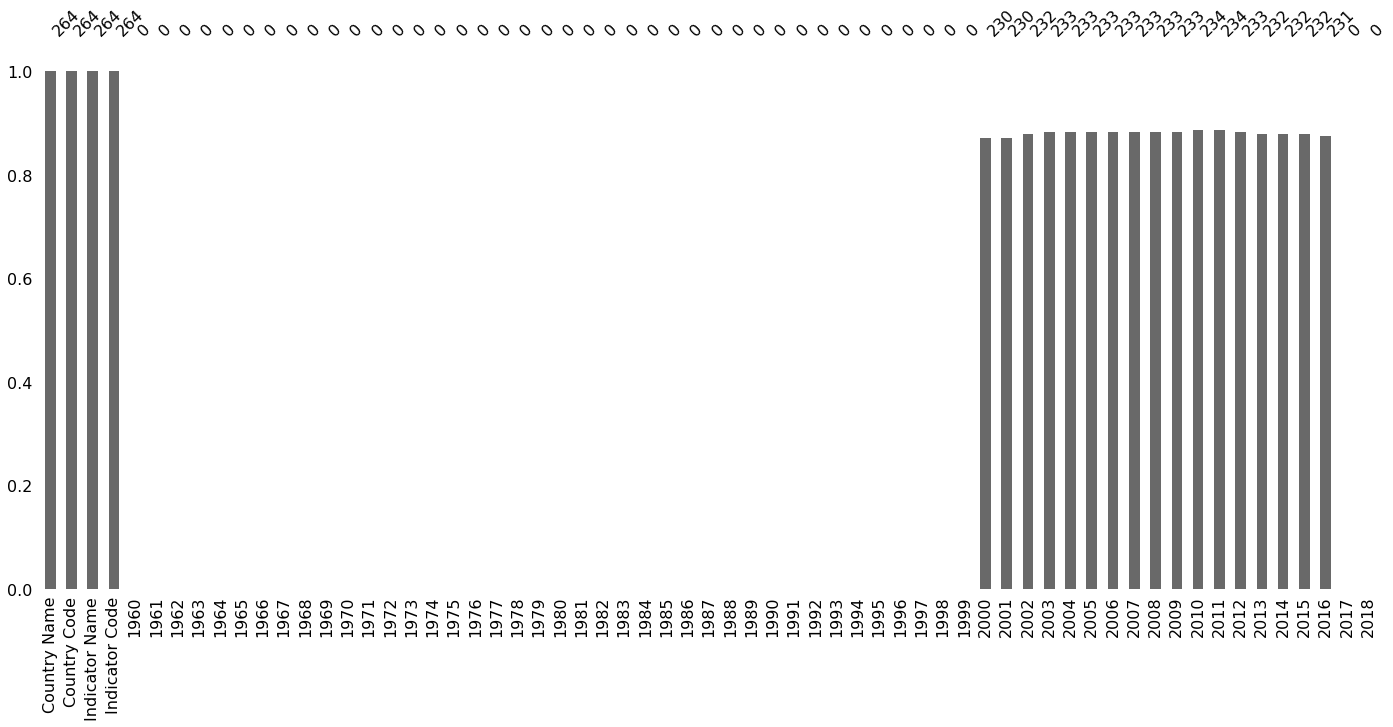

In [303]:
mno.bar(wb_hcpcs_df1)

Because this data set is just about one indicator, health care per capita spending, let's drop the two columns, `Indicator Name` and `Indicator Code`, drop the columns from `1960` to `1999` because they are empty, and rename `Country Name` to `Country` and `Country Code` to `ISO_Alpha`.

In [304]:
wb_hcpcs_df2 = wb_hcpcs_df1.drop(wb_hcpcs_df1.iloc[:, 2:44], axis=1)

wb_hcpcs_df2.head()

Country Name Country Code         2000         2001         2002  \
0        Aruba          ABW          NaN          NaN          NaN   
1  Afghanistan          AFG          NaN          NaN    16.249542   
2       Angola          AGO    12.963033    28.854245    28.961365   
3      Albania          ALB    75.531472    81.946417    89.858329   
4      Andorra          AND  2050.647513  2081.275330  2256.349073   

          2003         2004         2005         2006         2007  \
0          NaN          NaN          NaN          NaN          NaN   
1    17.490737    20.927087    24.446512    28.416662    31.840183   
2    34.718297    49.526718    53.930701    69.424700    92.452016   
3   113.583982   151.980517   165.865512   172.795596   216.413135   
4  2774.089627  3161.482406  3536.122706  3689.705702  4094.544269   

          2008         2009         2010         2011         2012  \
0          NaN          NaN          NaN          NaN          NaN   
1    38.700492    42.304510    45.587750    51.553259    52.218506   
2   135.208309   119.808614    96.643701   122.117809   122.242944   
3   239.684351   206.944820   203.208588   246.803760   246.742546   
4  4201.729595  3911.895963  3754.731346  4013.911834  3857.161116   

          2013         2014         2015         2016  2017  2018  
0          NaN          NaN          NaN          NaN   NaN   NaN  
1    55.967550    60.112761    60.088813    57.248760   NaN   NaN  
2   143.703204   131.751875   108.680670    95.220799   NaN   NaN  
3   277.668997   313.262897   264.434603   271.543043   NaN   NaN  
4  4107.733984  4346.258747  3698.117574  3834.730581   NaN   NaN

In [305]:
wb_hcpcs_df3 = wb_hcpcs_df2.iloc[:, :-2]

wb_hcpcs_df3.head()

Country Name Country Code         2000         2001         2002  \
0        Aruba          ABW          NaN          NaN          NaN   
1  Afghanistan          AFG          NaN          NaN    16.249542   
2       Angola          AGO    12.963033    28.854245    28.961365   
3      Albania          ALB    75.531472    81.946417    89.858329   
4      Andorra          AND  2050.647513  2081.275330  2256.349073   

          2003         2004         2005         2006         2007  \
0          NaN          NaN          NaN          NaN          NaN   
1    17.490737    20.927087    24.446512    28.416662    31.840183   
2    34.718297    49.526718    53.930701    69.424700    92.452016   
3   113.583982   151.980517   165.865512   172.795596   216.413135   
4  2774.089627  3161.482406  3536.122706  3689.705702  4094.544269   

          2008         2009         2010         2011         2012  \
0          NaN          NaN          NaN          NaN          NaN   
1    38.700492    42.304510    45.587750    51.553259    52.218506   
2   135.208309   119.808614    96.643701   122.117809   122.242944   
3   239.684351   206.944820   203.208588   246.803760   246.742546   
4  4201.729595  3911.895963  3754.731346  4013.911834  3857.161116   

          2013         2014         2015         2016  
0          NaN          NaN          NaN          NaN  
1    55.967550    60.112761    60.088813    57.248760  
2   143.703204   131.751875   108.680670    95.220799  
3   277.668997   313.262897   264.434603   271.543043  
4  4107.733984  4346.258747  3698.117574  3834.730581

In [306]:
wb_hcpcs_df4 = wb_hcpcs_df3.rename(columns={ "Country Name": "Country", \
                                        "Country Code": "ISO_Alpha" })
wb_hcpcs_df4.head()

Country ISO_Alpha         2000         2001         2002         2003  \
0        Aruba       ABW          NaN          NaN          NaN          NaN   
1  Afghanistan       AFG          NaN          NaN    16.249542    17.490737   
2       Angola       AGO    12.963033    28.854245    28.961365    34.718297   
3      Albania       ALB    75.531472    81.946417    89.858329   113.583982   
4      Andorra       AND  2050.647513  2081.275330  2256.349073  2774.089627   

          2004         2005         2006         2007         2008  \
0          NaN          NaN          NaN          NaN          NaN   
1    20.927087    24.446512    28.416662    31.840183    38.700492   
2    49.526718    53.930701    69.424700    92.452016   135.208309   
3   151.980517   165.865512   172.795596   216.413135   239.684351   
4  3161.482406  3536.122706  3689.705702  4094.544269  4201.729595   

          2009         2010         2011         2012         2013  \
0          NaN          NaN          NaN          NaN          NaN   
1    42.304510    45.587750    51.553259    52.218506    55.967550   
2   119.808614    96.643701   122.117809   122.242944   143.703204   
3   206.944820   203.208588   246.803760   246.742546   277.668997   
4  3911.895963  3754.731346  4013.911834  3857.161116  4107.733984   

          2014         2015         2016  
0          NaN          NaN          NaN  
1    60.112761    60.088813    57.248760  
2   131.751875   108.680670    95.220799  
3   313.262897   264.434603   271.543043  
4  4346.258747  3698.117574  3834.730581

#### Pickle WB HCPCS data

In [307]:
wb_hcpcs_df4.to_pickle('outputs/wb_hcpcs_df4.pickle')

## You finished Notebook 2!

Please proceed to Notebook 3.

## Note

Although you finished Notebook 2, where all data sets are loaded and processed, the World Bank data catalog has many more data sets that could be explored, related to poverty, climate, infrastructure, and others.